In [1]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import math
from matplotlib.texmanager import TexManager


sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
TexManager.font_info['Times New Roman'] = ('Times New Roman', r'\usepackage{Times New Roman}')

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

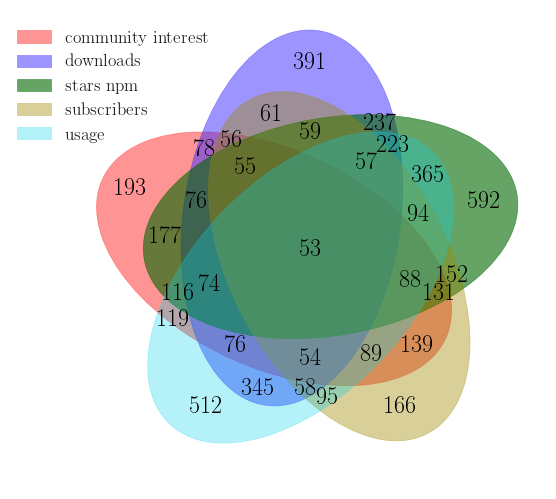

In [3]:
tabs={'00001': 512,
 '00010': 166,
 '00011': 95,
 '00100': 592,
 '00101': 365,
 '00110': 152,
 '00111': 94,
 '01000': 391,
 '01001': 345,
 '01010': 61,
 '01011': 58,
 '01100': 237,
 '01101': 223,
 '01110': 59,
 '01111': 57,
 '10000': 193,
 '10001': 119,
 '10010': 139,
 '10011': 89,
 '10100': 177,
 '10101': 116,
 '10110': 131,
 '10111': 88,
 '11000': 78,
 '11001': 76,
 '11010': 56,
 '11011': 54,
 '11100': 76,
 '11101': 74,
 '11110': 55,
 '11111': 53}

number={'community interest': 10000,
 'downloads': 1000,
 'stars npm': 100,
 'subscribers': 10,
 'usage': 1}

%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn
plt.rcParams['text.usetex'] = False
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.rcParams['text.usetex'] = True

#labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
fig, ax = venn.venn5(tabs, names=list(sorted(number.keys())))
ax.legend(bbox_to_anchor=(1, 0))
fig.set_size_inches(6,6)
ax.figure.savefig('../../../seneca_research/npm_popularity/figures/venn_pop.pdf', bbox_inches='tight', facecolor='white')


In [58]:
npm.sort_values('dep_pro', ascending=False, inplace=True)
npm['dep_pro']=npm['dep_pro'].apply(int)
df=npm.head(1000).loc[:,[]]

In [59]:
#df.reset_index().to_csv('../../../top_depend_upon.csv', sep=';', index=True)

In [22]:
# Already prepared the data for the NPM_FINAL dataframe
#Filter: at least 700 days, github, 
npm_packages=pd.read_csv('../../popularity/csv/npm_popularity_2yearsOld.csv', sep=';', dtype=object, index_col='name')

npm_packages['first_release']=npm_packages['first_release'].apply(lambda x:
                                                                  float("".join(re.findall("[0-9.]+", x))) if 'day' in x 
                                                                  else float("".join(re.findall("[0-9.]+", x)))*30 if 'month' in x
                                                                  else (datetime.now().date() - 
                                                                        datetime.strptime(x, '%b %d, %Y').date()).days)

for x in npm_packages:
    #if x!= "first_release":
    npm_packages[x]=npm_packages[x].apply(float)
    npm_packages[x]=npm_packages[x].apply(float)
        

npm_packages.drop_duplicates(inplace=True)
npm_packages.drop('contributors', axis=1, inplace=True)

npm2=pd.read_csv('../../popularity/csv/only_npm.csv', sep=',', dtype=object, index_col=None)
npm2=npm2.loc[:,['Name','Repository URL']]
npm2=npm2.rename(columns = {'Name':'name','Repository URL':'url'})

npm2=npm2.set_index('name').merge(npm_packages,
                               left_index=True, 
                               right_index=True,
                               how='outer').dropna().reset_index()
npm2.dropna(inplace=True)

In [23]:
# remove duplicates, take only the popular ones with unique repository name
npm=npm2.sort_values('downloads', ascending=False)
npm['url']=npm['url'].apply(lambda x: x.split('/')[-2]+'-'+x.split('/')[-1])
npm=npm.groupby('url').first().reset_index()
npm.set_index('name', inplace=True)
npm.drop(['url','first_release','commits','dep_repo','dep_pro'], axis=1, inplace=True)
len(npm)

175774

In [24]:
### add more metrics from librariesio
librariesio=pd.read_csv('../../popularity/csv/popularity_deps.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

npm=(npm.
     merge(librariesio.
           set_index('name'),
           left_index=True,
           right_index=True,
           how='left')
    )

len(npm)

175774

In [30]:
npm.head()

,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,transitive_runtime,direct_runtime,transitive,direct,repo,repo_runtime
name,,,,,,,,,,,,,
gulp-plates,445.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2,NaN,2.0,NaN,NaN
gulp-prefix,5031.0,5.0,3.0,7.0,4.0,1.0,9.0,5.0,7,17.0,12.0,47.0,6.0
path-format,20222.0,6.0,0.0,0.0,0.0,1.0,0.0,15.0,7,27.0,7.0,3.0,3.0
gulp-dest-atomic,1055.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,2,NaN,2.0,NaN,NaN
data-array,586.0,0.0,0.0,8.0,1.0,4.0,2.0,NaN,1,NaN,1.0,NaN,NaN


In [34]:
df_tmp=npm.dropna()
df_tmp=df_tmp.loc[:,['transitive_runtime','repo_runtime','direct_runtime']]
df_tmp.dropna(inplace=True)
for x in df_tmp:
    #if x!= "first_release":
    df_tmp[x]=df_tmp[x].apply(float)
df_tmp.corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,transitive_runtime,repo_runtime,direct_runtime
transitive_runtime,1.0,0.58,0.61
repo_runtime,0.58,1.0,0.71
direct_runtime,0.61,0.71,1.0


In [35]:
df_tmp.corr(method="spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,transitive_runtime,repo_runtime,direct_runtime
transitive_runtime,1.0,0.62,0.72
repo_runtime,0.62,1.0,0.73
direct_runtime,0.72,0.73,1.0


In [28]:
df_tmp=npm.dropna()
df_tmp=df_tmp.loc[:,['forks','stars_github','pulls_issues','subscribers']]
df_tmp.dropna(inplace=True)
for x in df_tmp:
    #if x!= "first_release":
    df_tmp[x]=df_tmp[x].apply(float)
df_tmp.corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,forks,stars_github,pulls_issues,subscribers
forks,1.0,0.85,0.65,0.76
stars_github,0.85,1.0,0.65,0.77
pulls_issues,0.65,0.65,1.0,0.56
subscribers,0.76,0.77,0.56,1.0


,forks,stars_github,pulls_issues,subscribers
forks,1.0,0.86,0.82,0.69
stars_github,0.86,1.0,0.77,0.67
pulls_issues,0.82,0.77,1.0,0.66
subscribers,0.69,0.67,0.66,1.0


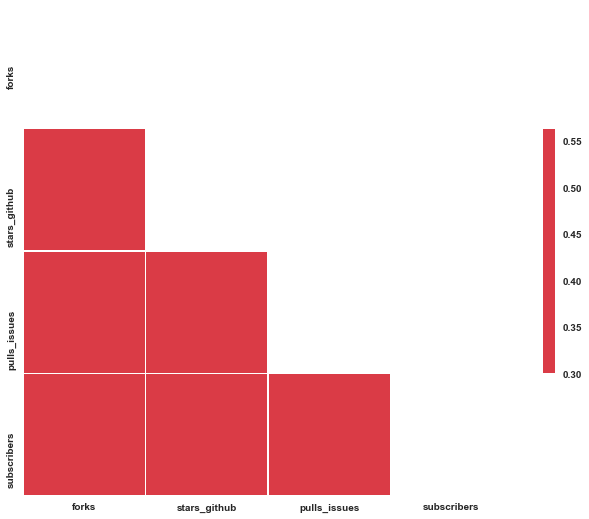

In [8]:
corr=df_tmp.corr(method="pearson")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
plt.rcParams['text.usetex'] = False

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df_tmp.head()

,forks,stars_github,pulls_issues,subscribers
name,,,,
gulp-prefix,4.0,7.0,9.0,1.0
path-format,0.0,0.0,0.0,1.0
corelocation,1.0,4.0,4.0,1.0
ver-iterator,0.0,2.0,13.0,1.0
zerorpc,103.0,553.0,96.0,36.0


In [10]:
corrr=npm.loc[:,['forks','stars_github','pulls_issues','subscribers']]
ax=corrr.corr(method="spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [11]:
ax

,forks,stars_github,pulls_issues,subscribers
forks,1.0,0.73,0.7,0.55
stars_github,0.73,1.0,0.64,0.55
pulls_issues,0.7,0.64,1.0,0.53
subscribers,0.55,0.55,0.53,1.0


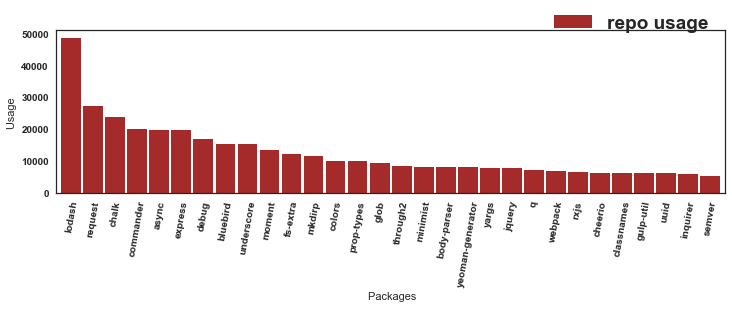

In [14]:
df=npm.sort_values('dependents', ascending=False)
df=df.head(30)
df['repo usage']=df['dependents']
ax=df.plot(kind='bar', color=['brown'], y='repo usage', width=0.9)
ax.set_ylabel('Usage ')
ax.set_xlabel(' Packages')
ax.legend( loc='upper right', 
          bbox_to_anchor=(1, 1.2), fontsize=19,ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation='80')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)

In [17]:
f=list(df.index)+list(df2.index)
len(set(f))

55

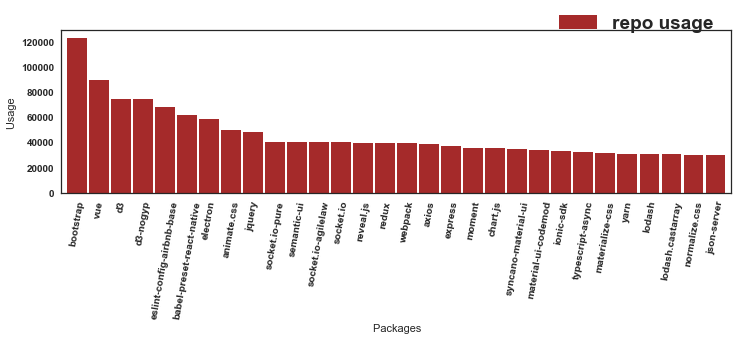

In [16]:
df2=npm.sort_values('stars_github', ascending=False)
df2=df2.loc[:,['stars_github']]
df2.drop_duplicates(inplace=True)
df2=df2.sort_values('stars_github', ascending=False)
df2=df2.head(30)

df2['repo usage']=df2['stars_github']
ax=df2.plot(kind='bar', color=['brown'], y='repo usage', width=0.9)
ax.set_ylabel('Usage ')
ax.set_xlabel(' Packages')
ax.legend( loc='upper right', 
          bbox_to_anchor=(1, 1.2), fontsize=19,ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation='80')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)

In [19]:
npm.head()

,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,transitive_runtime,direct_runtime,transitive,direct,repo,repo_runtime
name,,,,,,,,,,,,,
gulp-plates,445.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2,NaN,2.0,NaN,NaN
gulp-prefix,5031.0,5.0,3.0,7.0,4.0,1.0,9.0,5.0,7,17.0,12.0,47.0,6.0
path-format,20222.0,6.0,0.0,0.0,0.0,1.0,0.0,15.0,7,27.0,7.0,3.0,3.0
gulp-dest-atomic,1055.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,2,NaN,2.0,NaN,NaN
data-array,586.0,0.0,0.0,8.0,1.0,4.0,2.0,NaN,1,NaN,1.0,NaN,NaN


In [18]:
df=npm.sort_values(['dep_pro'],ascending=False)
df.query('dep_pro<18000', inplace=True)
df.sort_values('dep_pro', inplace=True)
df['dep_pro']=df['dep_pro'].apply(lambda x: str(int(x/1000))+'k')


ax = sns.boxplot(x="dep_pro", y="dep_repo", data=df,  color="orange", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')

ax.figure.set_size_inches(12,3)
#ax.set_xlim(0,50)
ax.set_ylim(0,180000)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('\# transitive dependent packages')
ax.set_ylabel('\# dependent repostiries')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#ax.figure.savefig('../../../seneca_research/npm_popularity/figures/dep_pro_repo.pdf', bbox_inches='tight', facecolor='white')
#color_map = plt.cm.Spectral_r
#fig=plt.figure(figsize=(10,9))
#ax = fig.add_subplot(111)
#image = plt.hexbin(data=df, x='dep_pro', y='dep_repo',cmap=color_map,gridsize=500,mincnt=1,bins='log')
#cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)



KeyError: 'dep_pro'

In [20]:
npm['usage']=(npm['dep_pro'] + npm['dep_repo'])
npm['community_interest']=(npm['stars_github']+
                          npm['forks']+
                          (npm['pulls_issues']*npm['pulls_issues'])
                          )
             

KeyError: 'dep_pro'

In [12]:
#Pearsonr R correlation
scipy.stats.pearsonr(npm['downloads'].values,
                     npm['usage'].values)

KeyError: 'usage'

In [26]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm['downloads'].values,
                     npm['usage'].values)

KeyError: 'usage'

In [66]:
if False:
    df=npm_packages.sort_values(['dep_pro'],ascending=False)
    df.query('dep_pro<15000', inplace=True)
    df.sort_values('dep_pro', inplace=True)

    color_map = plt.cm.Spectral_r
    fig=plt.figure(figsize=(10,9))
    ax = fig.add_subplot(111)
    image = plt.hexbin(data=df, x='dep_pro', y='dep_repo',cmap=color_map,gridsize=500,mincnt=1,bins='log')
    cb = plt.colorbar(image,spacing='uniform',extend='max')
    ax.set_xlim(0,2000)
    ax.set_ylim(0,100000)
    ax.figure.set_size_inches(12,3)



In [43]:
npm2=npm.dropna()
for x in npm2:
    if x!= "name" and x!= "url":
        npm2[x]=npm2[x].apply(float)
        npm2[x]=npm2[x].apply(int)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
npm2.head()

,index,name,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,transitive_runtime,direct_runtime,transitive,direct,repo,repo_runtime
0,86,bootstrap,23364289,2653,305,123128,58534,7293,25681,1204,3266,14998,5075,20467,16417
1,40,vue,10831373,4329,225,89743,13161,4757,7499,758,4460,12697,7431,10014,4981
2,125,d3,13831613,1636,155,74537,19029,3663,3065,1550,1946,2985,2324,5380,4545
4,20,jquery,54999911,7757,360,48526,15232,3549,3988,9409,9498,80016,13352,44784,28807
5,1479,babel-preset-react-native,7071582,105,3,62143,14135,3469,18616,1252,118,3456,1373,2026,484


In [45]:
# TOP 1000 DOWNLOADED
npm2.reset_index(inplace=True)
top=1000
npm2.sort_values('downloads', inplace=True, ascending=False)
df_downloads=npm2.head(top).loc[:,['name']]
df_downloads['type']='downloads'

# TOP 1000 STARRED
npm2.sort_values('stars_npm', inplace=True, ascending=False)
df_stars=npm2.head(top).loc[:,['name']]
df_stars['type']='stars npm'

# TOP 1000 SUBSCRIBED
npm.sort_values('subscribers', inplace=True, ascending=False)
df_subscribers=npm2.head(top).loc[:,['name']]
df_subscribers['type']='subscribers'

# TOP 1000 COMMUNITY INTEREST
df_community=npm2.sort_values('forks', ascending=False)
df_community['community interest']=(df_community['stars_github']+
                          df_community['forks']+
                          (df_community['pulls_issues']*
                           df_community['pulls_issues'])
                         )
df_community.sort_values('community interest', inplace=True, ascending=False)
df_community=df_community.head(top).loc[:,['name']]
df_community['type']='community interest'

# TOP 1000 USED
df_usage=npm2.sort_values('forks', ascending=False)
df_usage['usage']=(df_usage['transitive_runtime'] + df_usage['repo_runtime'])
df_usage.sort_values('usage', inplace=True, ascending=False)
df_usage=df_usage.head(top).loc[:,['name']]
df_usage['type']='usage'

df_all=pd.concat([df_downloads,df_stars,df_subscribers,df_community,df_usage])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
npm2.sort_values('dependents', inplace=True, ascending=False)
df_dependents=npm2.head(top).loc[:,['name']]
df_dependents['top_dependent']='True'


df_all=df_all.set_index('name').merge(df_dependents.
                                      set_index('name'),
                                      left_index=True,
                                      right_index=True,
                                      how='outer').dropna().reset_index()
df_all.drop(['top_dependent'], axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
lis=df_all.groupby('name')['type'].apply(list)
tab= [i for i in lis]
from pymining import seqmining 
freq_seqs = seqmining.freq_seq_enum(tab, 1)
#print("Seuls: ",sorted(freq_seqs))

In [48]:

number={}
number['community interest']=10000
number['downloads']=1000
number['stars npm']=100
number['subscribers']=10
number['usage']=1
tabs={}
for x in freq_seqs:
    result=0
    for y in x[0]:
        result=result+number[y]
    result=str("%05d" % (result,))
    tabs[result]=x[1]

In [3]:
tabs={'00001': 512,
 '00010': 166,
 '00011': 95,
 '00100': 592,
 '00101': 365,
 '00110': 152,
 '00111': 94,
 '01000': 391,
 '01001': 345,
 '01010': 61,
 '01011': 58,
 '01100': 237,
 '01101': 223,
 '01110': 59,
 '01111': 57,
 '10000': 193,
 '10001': 119,
 '10010': 139,
 '10011': 89,
 '10100': 177,
 '10101': 116,
 '10110': 131,
 '10111': 88,
 '11000': 78,
 '11001': 76,
 '11010': 56,
 '11011': 54,
 '11100': 76,
 '11101': 74,
 '11110': 55,
 '11111': 53}

number={'community interest': 10000,
 'downloads': 1000,
 'stars npm': 100,
 'subscribers': 10,
 'usage': 1}

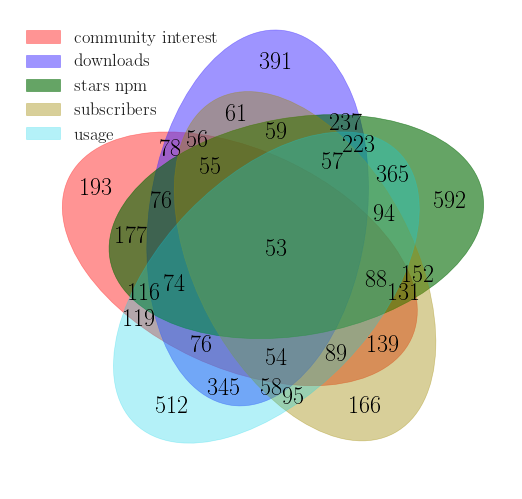

In [62]:
tabs={'00001': 512,
 '00010': 166,
 '00011': 95,
 '00100': 592,
 '00101': 365,
 '00110': 152,
 '00111': 94,
 '01000': 391,
 '01001': 345,
 '01010': 61,
 '01011': 58,
 '01100': 237,
 '01101': 223,
 '01110': 59,
 '01111': 57,
 '10000': 193,
 '10001': 119,
 '10010': 139,
 '10011': 89,
 '10100': 177,
 '10101': 116,
 '10110': 131,
 '10111': 88,
 '11000': 78,
 '11001': 76,
 '11010': 56,
 '11011': 54,
 '11100': 76,
 '11101': 74,
 '11110': 55,
 '11111': 53}

%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn
plt.rcParams['text.usetex'] = False
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.rcParams['text.usetex'] = True

#labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
fig, ax = venn.venn5(tabs, names=list(sorted(number.keys())))
ax.legend(bbox_to_anchor=(1, 0))
fig.set_size_inches(6,6)
#ax.figure.savefig('../../../seneca_research/npm_popularity/figures/venn_pop.pdf', bbox_inches='tight', facecolor='white')


In [2]:
%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn

In [74]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm.dep_repo,
                     npm.dep_repo)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [72]:
npm.head(1)

,url,first_release,dep_pro,dep_repo,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,commits,usage,community interest,community_interest
name,,,,,,,,,,,,,,,
mocha,mochajs-mocha,2348.0,129000,305000.0,74746258.0,3956.0,694.0,15080.0,2112.0,399.0,3304.0,311.0,434000.0,10933608.0,10933608.0


In [1]:
#Pearsonr R correlation
lib=['dep_pro']
scipy.stats.kendalltau(npm.dep_pro,
                     npm.dep_repo)

NameError: name 'scipy' is not defined

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Text(0.5,0,'Community interest ')

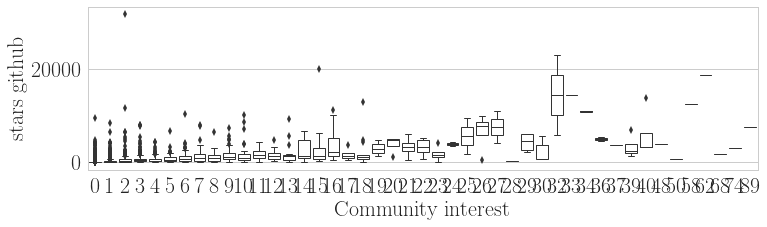

In [81]:
df=npm.query('stars_github<123128')
#df['community_interest']=(df['stars_github']+
#                          df['forks']+
#                          (df['pulls_issues']*
#                           df['pulls_issues'])
#                         )
#df=df.query('community_interest<2000000')
#df.sort_values(['community_interest'],ascending=False, inplace=True)
#df['community_interest']=df['community_interest'].apply(lambda x: int(x/100000))

df.sort_values('stars_github', inplace=True)
df['stars_github']=df['stars_github'].apply(lambda x: int(x/1000))

ax = sns.boxplot(x="stars_github", y="pulls_issues", data=df,  color="white", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)

plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')

ax.figure.set_size_inches(12,3)
#ax.set_xlim(0,20)
#ax.set_ylim(0,10000)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('stars github ')
ax.set_xlabel('Community interest ')


In [28]:
librariesio.query('name=="jasmine"')

,name,transitive_runtime,direct_runtime,transitive,direct,repo,repo_runtime
150279,jasmine,515.0,343,52509.0,6347.0,6852.0,1517.0


In [11]:
df_tmp.head()

,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,transitive_runtime,direct_runtime,transitive,direct,repo,repo_runtime
name,,,,,,,,,,,,,
gulp-prefix,5031,5,3,7,4,1,9,5.0,7,17.0,12.0,47.0,6.0
path-format,20222,6,0,0,0,1,0,15.0,7,27.0,7.0,3.0,3.0
corelocation,378,3,0,4,1,1,4,3.0,4,3.0,4.0,1.0,1.0
ver-iterator,92,1,0,2,0,1,13,2.0,3,5.0,4.0,1.0,1.0
zerorpc,15081,11,7,553,103,36,96,86.0,90,86.0,90.0,34.0,34.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0,'\\# Dependent repositories')

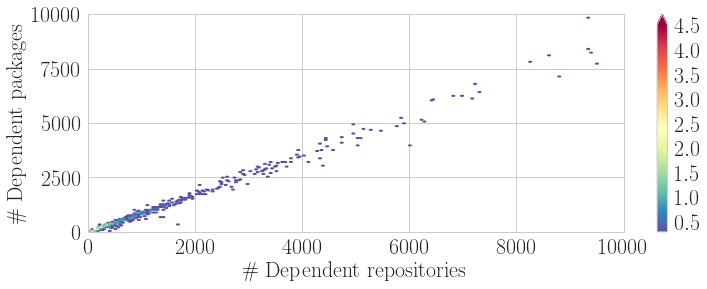

In [29]:

df_tmp=npm.dropna()

for x in df_tmp:
    df_tmp[x]=df_tmp[x].apply(float)
    df_tmp[x]=df_tmp[x].apply(float)


color_map = plt.cm.Spectral_r
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
image = plt.hexbin(data=df_tmp, x='direct_runtime', y='dependents',cmap=color_map,gridsize=1000,mincnt=1,bins='log')
cb = plt.colorbar(image,spacing='uniform',extend='max')
ax.figure.set_size_inches(12,4)
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_ylabel('\# Dependent packages')
ax.set_xlabel('\# Dependent repositories')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)
#ax.figure.savefig('../../../seneca_research/npm_popularity/figures/pro_repo.pdf', bbox_inches='tight', facecolor='white')

In [32]:
scipy.stats.pearsonr(df_tmp.direct_runtime,
                     df_tmp.dependents)

(0.99855045972581891, 0.0)